<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/M_m%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Mínimos Cuadrados**

Es un método que busca una función aproximada que se acerque lo más posible a la solución real de un problema.
Para una EDO, se calcula el residuo (la parte que no cumple la ecuación) y se minimiza la integral:

$$
\int_{a}^{b} E^{2}\, dx
$$

$$
[a,b] = [0,1]
$$

Al minimizar este valor, se obtienen los coeficientes óptimos de la aproximación.

Sea la ecuación diferencial
$$
\
u'' + u = x,
\
$$
con condiciones iniciales
$$
\
u(0) = 0, \qquad u'(0) = 2.
\
$$
Buscamos una solución aproximada de la forma:

$$\
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
\$$
con el método de mínimos cuadrados

In [21]:
import sympy as sp ##Álgebra simbólica: derivadas, integrales, ecuaciones, expresiones exactas
import numpy as np ## Cálculo numérico
import matplotlib.pyplot as plt #Gráficas: visualización de datos

In [22]:
x = sp.symbols('x') #crea una variable simbólica para las derivadas
u = sp.Function('u') # declara una función simbólica para las ecuaciones diferenciales

Solución Analítica

In [23]:
##Solución analítica implementando SymPy
ode = sp.Eq(sp.diff(u(x), x, 2) + u(x), x)   # u'' + u = x, resuelve ecuaciones diferenciales.
sol_analitica = sp.dsolve(
    ode,
    ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2} #diccionario con las condiciones iniciales
)

In [24]:
print("Solución analítica:")
print(sol_analitica)

Solución analítica:
Eq(u(x), x + sin(x))


In [25]:
u_exact_expr = sol_analitica.rhs  #expresión simbólica de SymPy en una función evaluable numéricamente
u_exact = sp.lambdify(x, u_exact_expr, "numpy")

In [26]:

# Función de prueba u_N(x) que satisface las Condiciones Iniciales
#    Tomamos un polinomio cúbico:
#       u_N(x)

a2, a3 = sp.symbols('a2 a3', real=True)

u_N = 2*x + a2*x**2 + a3*x**3

In [27]:
 #Residuo E(x) = u_N''(x) + u_N(x) - x
uN_2 = sp.diff(u_N, x, 2)  ##la segunda derivada de la aproximación
E = uN_2 + u_N - x


In [28]:
# Se palntea el funcional de mínimos cuadrados:
#       I(a2, a3)
I = sp.integrate(E**2, (x, 0, 1))


In [29]:
#Condiciones de óptimo (método de mínimos cuadrados)
dI_da2 = sp.diff(I, a2) ### Para obtener las derivadas parciales de I respecto a a2 y a3
dI_da3 = sp.diff(I, a3)


In [30]:
##Para resolver el sistema
sol_param = sp.solve([dI_da2, dI_da3], [a2, a3], simplify=True) #resuelve ese sistema de dos ecuaciones no lineales para obtener los valores óptimos de los parámetros
print(sol_param)

Parámetros óptimos (a2, a3) =
{a2: -1335/86789, a3: -24759/173578}


In [31]:
#Aproximación final y comparación
# Ensegida se sutituyen los valores óptimos en u_N(x)
u_aprox_expr = sp.simplify(u_N.subs(sol_param))
print("Aproximación u_N(x) =")
print(u_aprox_expr)

u_aprox = sp.lambdify(x, u_aprox_expr, "numpy")

Aproximación u_N(x) =
x*(-24759*x**2 - 2670*x + 347156)/173578


Para comparación numérica y el cálculo del error

In [32]:

xx = np.linspace(0, 1, 400)
yy_exact = u_exact(xx)
yy_aprox  = u_aprox(xx)

#Pra calcular  Error puntual
error = np.abs(yy_exact - yy_aprox)

# para la Norma infinito (error máximo)
error_max = np.max(error)

# Norma L2 aproximada (integral del cuadrado)
error_L2 = np.sqrt(np.trapz(error**2, xx))

print("Error máximo (norma infinito) = ", error_max)
print("Error L2 aproximado = ", error_L2)


Error máximo (norma infinito) =  0.0011010167530067783
Error L2 aproximado =  0.0006831616158321982


/tmp/ipython-input-867271576.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  error_L2 = np.sqrt(np.trapz(error**2, xx))


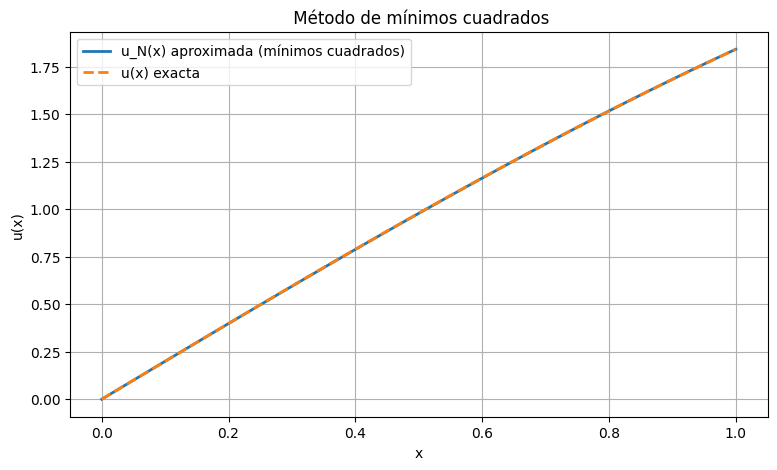

In [33]:

# Gráfica de la solución analitica  y numérica
xx = np.linspace(0, 1, 100)
yy_exact = u_exact(xx)
yy_aprox  = u_aprox(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, yy_aprox, label="u_N(x) aproximada (mínimos cuadrados)", linewidth=2)
plt.plot(xx, yy_exact, "--", label="u(x) exacta", linewidth=2)

plt.title(" Método de mínimos cuadrados")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

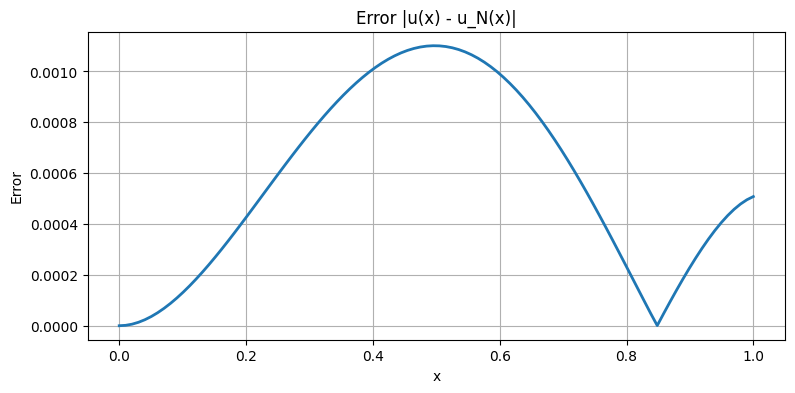

In [34]:
# Gráfica del error

yy_exact_100 = u_exact(xx)
yy_aprox_100 = u_aprox(xx)

# Error puntual for 100 points
error_100 = np.abs(yy_exact_100 - yy_aprox_100)

plt.figure(figsize=(9, 4))
plt.plot(xx, error_100, linewidth=2)
plt.title("Error |u(x) - u_N(x)|")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.show()